Plotting data as lines is fine for continuous functions like **sin** and **cos**, but often we want to compare data to each other and there are many types of plots that can visualise this better than line plots.

This week's tutorial session compared different plots and their uses. In this section, you'll look at how to create the following from Pandas Data Frames:

Area plots\
Scatter plots\
Pie plots\
Box plots\
Histograms\
Bar plots\

##  Area Plot

An Area plot represents the changes in one or more columns over time, this makes an area plot a good option in time series where you want to show relative sizes between columns. If you want to simply compare values at a particular time, a line plot is often clearer. You can find out more information on how to use Area Plots by reading the Pandas API reference (Links to an external site.) for data frame plot area. \
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html

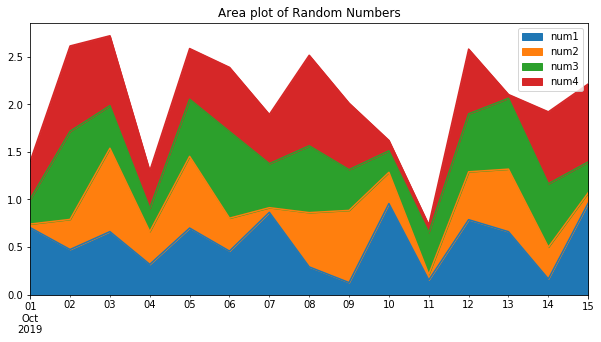

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# we create a time series with positive number
dataRange = len(pd.date_range('2019-10-01', '2019-10-15'))

# create a 2D numpy array with dataRange number of rows and 4 columns
data = np.random.rand(dataRange, 4)

# create a Data Frame from 2D array
df_random = pd.DataFrame(data, index = pd.date_range('2019-10-01', '2019-10-15'),
                        columns = ['num1', 'num2','num3','num4'])

# plot it
df_random.plot.area(figsize= (10,5), title='Area plot of Random Numbers')

Area plots show relative values of data. For example, if you look at the date Oct 1 on the x-axis, you can see that the column num2 has a larger area. What does this mean in terms of the random number? It means that the random number in num2 was larger than the random number of the other 3 columns.

Did you notice that the y-axis goes from 0 to 3, rather than 0 to 1? The top of each area is not the actual value; the actual value is the difference between the top and bottom of the columns plot. So, for example, for column num2, the top is around 1.25 and the bottom is around .4 (looking at the chart).   1.25 -.4 = .85 so the value of num2 on Oct 1, 2019 is approximately .85. What is the actual value?


In [2]:
# use loc[] to select the value from the data frame base on label
df_random.loc['2019-10-01','num2']

0.03725568019982328

What you can tell from this plot is that at Oct 1, 2019, the value of num2 was larger than the value of num4, which was larger than the value of num1, which was larger than the value of num3. Area charts can show relative proportions. It also helps to visualise totals. Can you identify on which date the total (sum) of all the random numbers was the smallest?

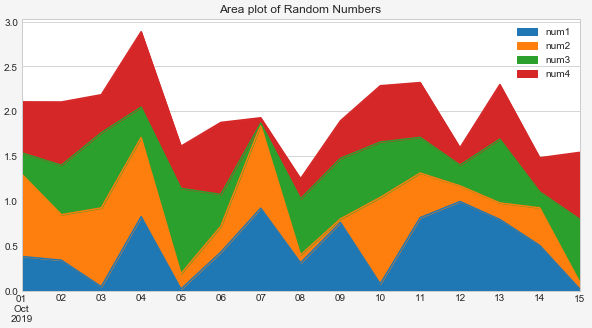
The date with the smallest sum of random numbers is 8 Oct, 2019.

## Scatter Plot

A scatter plot is similar to a line plot. Instead of the data points being joined by a line, here the points are represented individually. You can represent your points using circles, dots or other shapes. You can find details about the representation of the point in a scatter plot by reading the Pandas API Reference (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter.) for data frame scatter plots. 

NOTE: Scatter plots need an x-axis and a y-axis, you can take these values from two columns in your Data Frame.

(0, 1.2)

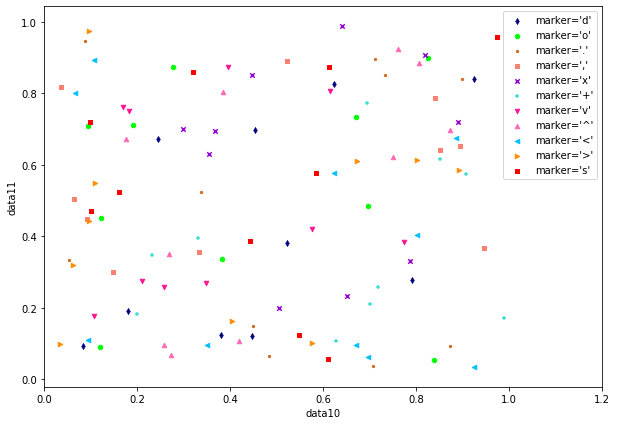

In [3]:
# plotting from a dataframe using scatter plots with different color and markers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['yellow','lime','chocolate','salmon', 'darkviolet','turquoise','deeppink',
          'hotpink','deepskyblue','darkorange','red']
markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's']

# create  a data frame of 12 columns with random numbers

df_markers = pd.DataFrame({'data0':np.random.rand(10),
                           'data1':np.random.rand(10),
                           'data2':np.random.rand(10),
                           'data3':np.random.rand(10),
                           'data4':np.random.rand(10),
                           'data5':np.random.rand(10),
                           'data6':np.random.rand(10),
                           'data7':np.random.rand(10),
                           'data8':np.random.rand(10),
                           'data9':np.random.rand(10),
                           'data10':np.random.rand(10),
                           'data11':np.random.rand(10)})

# plot the data

#If you just plot the data frame, scatter plot will create a separate plot for each data columnn.

#If you want all of the plots to end up on the same chart 
# you need to set the axes of all plots to be the same.
# plot.scatter() will return the axes used when you call plot, 
# so save these axes when you plot your first plot 
# and then re-use that same axes for all the rest of your plots

currentPlotNumber = 0

# we've used another method of string objects here
# string.format this allows you to substitute a value into a string
# in this example, the marker itself is being substituted into the string where
# the {0} is.
# you can see more examples at https://docs.python.org/2/library/string.html#format-examples

# plot the first plot: diamond marker, navy color
plotAxes=df_markers.plot.scatter(x=currentPlotNumber,y=currentPlotNumber+1,
                             c='navy', marker='d', 
                             label="marker='{0}'".format('d'), 
                             figsize=(10,7),lw=0.5)


# the rest of the plots 
# (remember to set ax=plotAxes so the data all plots on the same chart as the first plot)
for m in markers:
    currentPlotNumber = currentPlotNumber+1
    df_markers.plot.scatter(x=currentPlotNumber,y=currentPlotNumber+1,
                             c=colors[currentPlotNumber], marker=m, 
                            label="marker='{0}'".format(m), ax=plotAxes )

# move the legend to the upper right of the plot
plotAxes.legend(loc='upper right')

# use set_xlim to set the range of x values
# try plotting the graph with and without this set to see the difference
plotAxes.set_xlim(0, 1.2)

Scatter plots can help you see clusters of data (where lots of data falls around the same value). There aren't any clusters of data in the example. That's a good thing!! Random data shouldn't have clusters — it should be, well... random!

## Scatter Plot — Iris Data Set

Usually, the scatter plots are used to measure the correlation between two variables. Let's get a look at some classic data called the iris data set. This data set has three species of the iris flower. It is commonly used to illustrate classification, due to having four attributes that identify different species:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
Let's look at how the attributes and the species are correlated.

In this example, we download The Iris Dataset from the scikit learn library\
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Loading the data set has given us a Python dictionary.

The 'data' key has the value of a 2-dimensional NumPy array of values. Each row is a sample of four column values: sepal length, sepal width, petal length, and petal width.
The 'target' key is a 1-dimensional array where each row value is the type of Iris sampled for the matching 'data' row values. A value of 0 (for setosa), 1 (for versicolor) and 2 for 'virginica'.
'target_names' is a list of the Iris names: 'setosa' 'versicolor' and 'virginica'.
'DESCR' contains a string describing the data set.
Let's start by converting this into a Pandas data frame.

In [5]:
import pandas as pd
import numpy as np

# First we want to be combine the information about  which type of Iris the sample is from ('target')
# with the sepal and petal values ('data' array)

# add the 'target' data as a new column
combinedData = np.column_stack((iris['data'],iris['target']))

# now create a data frame
df_iris = pd.DataFrame(combinedData)

# add some labels for the columns
# (try taking this line out in your notebook and see what column names you get by default)
df_iris.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df_iris.head() #display 5 rows 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Text(0, 0.5, 'Width of Sepal')

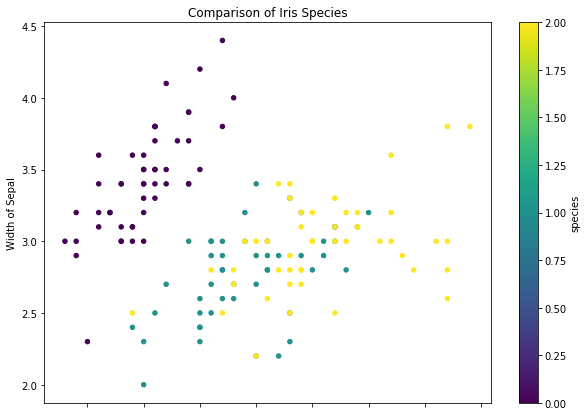

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#Species: 0='setosa', 1='versicolor', 2='virginica'
ax=df_iris.plot.scatter(x='sepal_length', 
                        y='sepal_width', 
                        c='species',
                        title = 'Comparison of Iris Species', 
                        figsize=(10,7),colormap='viridis')

ax.set_xlabel('Length of Sepal')
ax.set_ylabel('Width of Sepal')

Here, you can see the 0 values (setosa) are purple and that the sepal length and sepal width values cluster together for this variety. This would be a good way to tell if the iris you are looking at is a Setosa. For the other two varieties (versicolor and virginica), the separation isn't very clear. So, the sepal width and sepal length are not likely to be enough to distinguish between these two varieties.

There are several customisations that you can make to your scatter plot, such as different shapes for your points, different colour schemes, etc. If you want to experiment, have a look at scatter plots on The Python Graph Gallery \
https://python-graph-gallery.com/131-custom-a-matplotlib-scatterplot/

## Practise Scatter Plots

In your Jupyter Notebook, write code to create at least 3 scatter plots, plotting different combinations of the attributes (sepal_length, sepal_width, petal_length, and petal_width), selecting a different pair for each plot and using them as x-axis and y-axis. Use the species determining the colour.

Can you discover any more correlations that would be good identifiers for the different species?

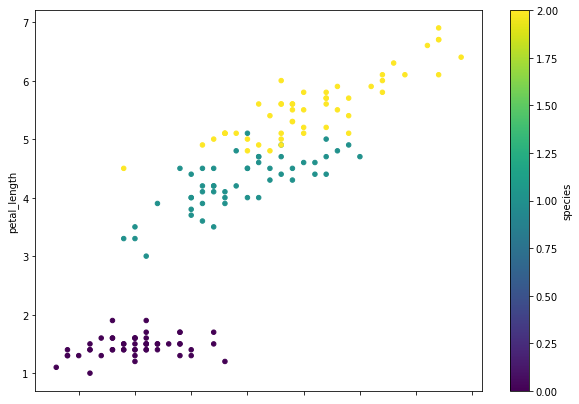

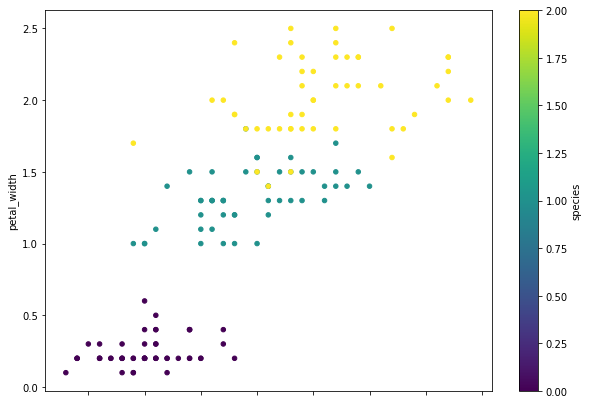

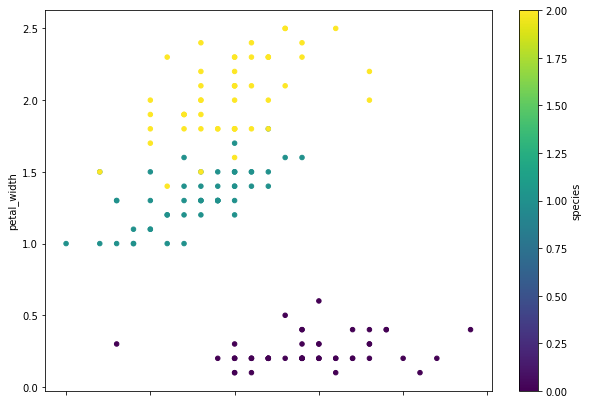

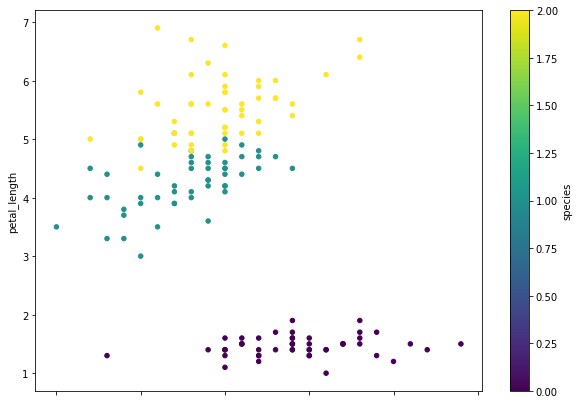

In [7]:
#Solutions sepals_length, sepals_width, petal_length, and petal_width
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df_iris.plot.scatter(x='sepal_length', y='petal_length', 
                     c='species',figsize=(10,7),colormap='viridis')
df_iris.plot.scatter(x='sepal_length', y='petal_width', 
                     c='species',figsize=(10,7),colormap='viridis')
df_iris.plot.scatter(x='sepal_width', y='petal_width', 
                     c='species',figsize=(10,7),colormap='viridis')
df_iris.plot.scatter(x='sepal_width', y='petal_length',
                     c='species',figsize=(10,7),colormap='viridis')

## Pie plot

If you want to represent proportions, a pie plot can be a good choice.

You can see a pie chart below. Each wedge represents one of the groups of data. In this example, each wedge is one of the three iris varieties. The size of a wedge is determined by the number of data rows in the data frame for that iris variety. From the chart below, you can very quickly see that each of the iris varieties had the same number of data rows. The percentage of the total data set is displayed in the wedge (in this case, each variety had 33.3% of all the data).

Like other plots, you can change a lot about how this pie chart is displayed. Go to Matplotlib (https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pie.html) and look at the property attributes of this plot.

Before moving on, experiment with changing the attribute values in the pie( ) function and see the effect on the graph. Add at least three new attributes from those listed on Matplotlib

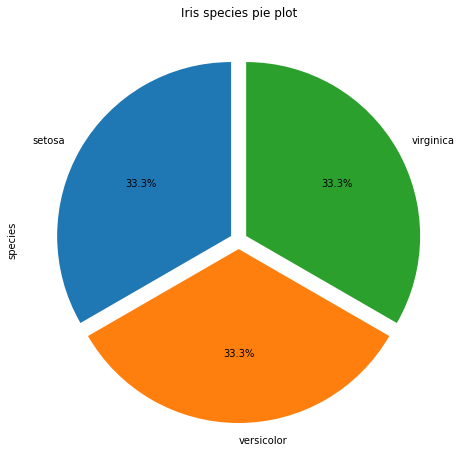

In [8]:
# example of a pie plot counting the species
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# you need calculate the wedges values, so count how many rows belong to each species 
# iris.species selects the species column as a Series
# Series.value_counts() returns a Series with the counts
# our Series will be number of , numberOf1, numberOf

df_iris.species.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%', 
                                            figsize=(10,8), 
                                            title = 'Iris species pie plot',
                                            startangle=90,
                                            labels=['setosa','versicolor','virginica'])

## Box Plot

A box plot allows you to see the distribution of your data, from its smallest expected value to the largest expected value. Box plots show five pieces of information: minimum expected value, first quartile (25% of the data is less than this value), the median(50% of data is less than this value), third quartile (75% of data is less than this value), and the maximum expected value. You can also see if your data has what are known as 'outliers' data that is outside the normal range of values.

Box plots are also good for seeing if your data is symmetrical. For example, are most of your values are higher values or lower values, or are they equally spread between high and low values?

You can find out more details on boxplots by reading the Pandas API reference (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) for data frame box plot.

In the box plot below, you can see that the length of sepals has a range of values from just above 4 to almost 8 cms. But they are more likely to be towards the lower end of that range. In sepal width, you can see some outliers (the circles). Statistics over the data indicated that the values should range from just above 2 cm to 4 cm, but there were 4 data points (out of the 150) that didn't match that distribution.

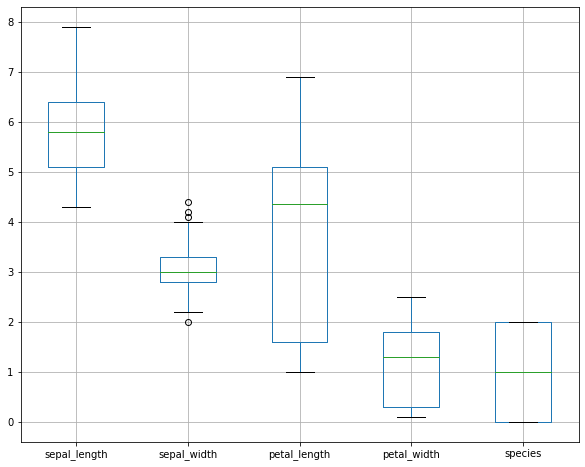

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df_iris.boxplot(figsize=(10,8))

This plot groups all the different varieties of Iris together. Maybe some are more or less consistent in their values. You can separate the different data using the by attribute in boxplot().

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E6D234388>,
      dtype=object)

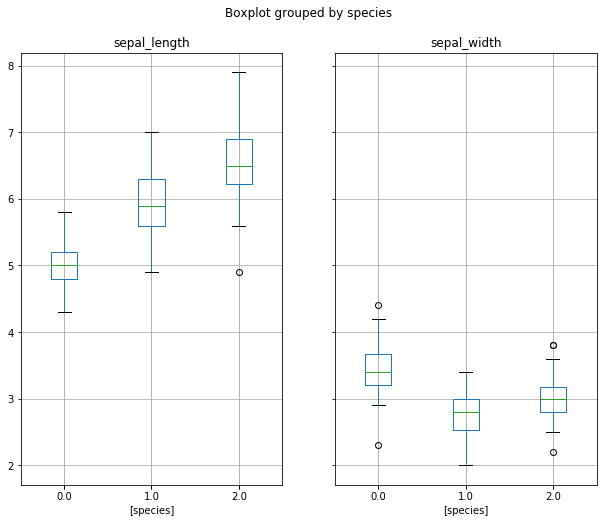

In [10]:
# group by a specific column
#In this example we are plotting 'sepal_length', 'sepal_width' grouping by species 
df_iris.boxplot(column=['sepal_length', 'sepal_width'], 
                by=['species'],
                figsize=(10,8))

## Practise Sklearn Data Sets

In your Jupyter Notebook, write code to download any of the toy datasets (like iris) from sklearn library. Using the data set that you chose, plotting:
two pie plots (you can use any columns)
two box plots. Include title, labels, and legend.

In [11]:
# Code to import a data set (the Boston house prices data set is being used in this example)
from sklearn.datasets import load_boston
import pandas as pd 

boston =load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [12]:
# Code to transform the dataset in a Data Frame
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head( )

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Histogram Plot

A Histogram plot is used to show how frequently a particular value appears in the data.

You can find all the settable attributes for histograms by reading the Pandas API Reference (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) for data frame histograms.

Let's see how often various possible values of petal lengths and widths, sepal lengths and widths, and the different varieties appeared in our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E6D30E588>,
      dtype=object)

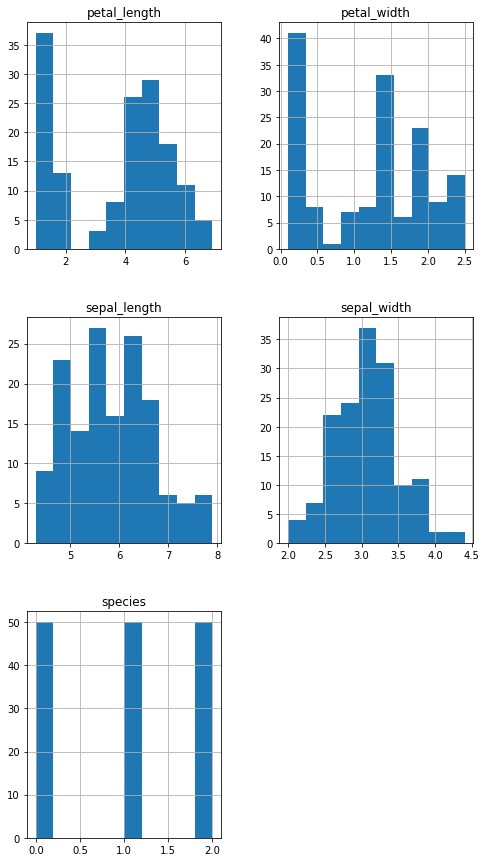

In [13]:
#Plot a histogram
df_iris.hist(figsize=(8,15))

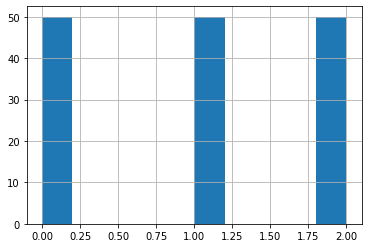

In [31]:
df_iris.species.hist()

Looking in the petal length plot, you can see that short petal lengths of just 1cm were the most common in the iris data set, with over 35 of the 150 samples having this length.

## Bar Plot

A bar plot looks like a histogram, but it is used to compare categories. For example, you might want to compare the mean:

length of petals\
width of petals\
width of sepals\
length of sepals\
Alternatively, perhaps you'd like to compare the ratio of average petal length and width, compared to the ratio of average sepal length and width to see whether they vary similarly.

Let's do both.

To start, you need to select the data you want to plot, which means calculating the mean of our columns.

Text(0, 0.5, 'centimetres')

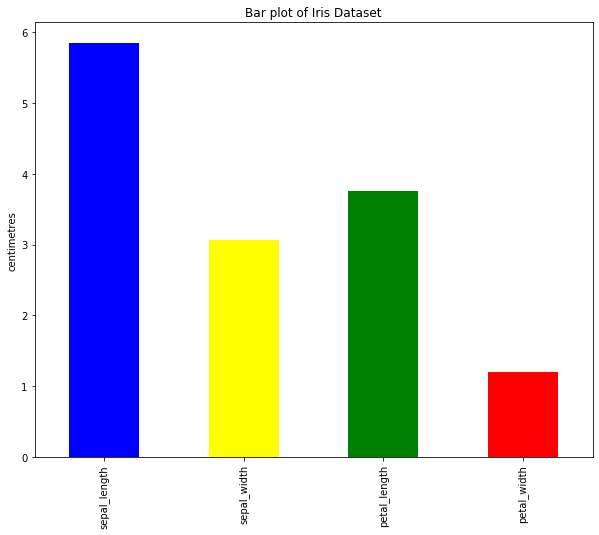

In [15]:
#Select the columns you want to see and apply the mean() method to the Series
barSeries = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
barSeries = barSeries.mean()

bar_plot = barSeries.plot.bar(figsize=(10,8),
                              title = 'Bar plot of Iris Dataset',
                              color = ['blue','yellow','green', 'red','coral']
                             )

bar_plot.set_ylabel('centimetres')

From this graph, you can see that sepal_length has the largest average value.

How about the average sepal length/width and petal length/width comparison? Again, you need to select the data you need.

This plot will use the same columns. Instead of calculating the mean of each of them, you need to take the mean of their ratios: sepal_length/sepal_width, petal_length/petal_width.

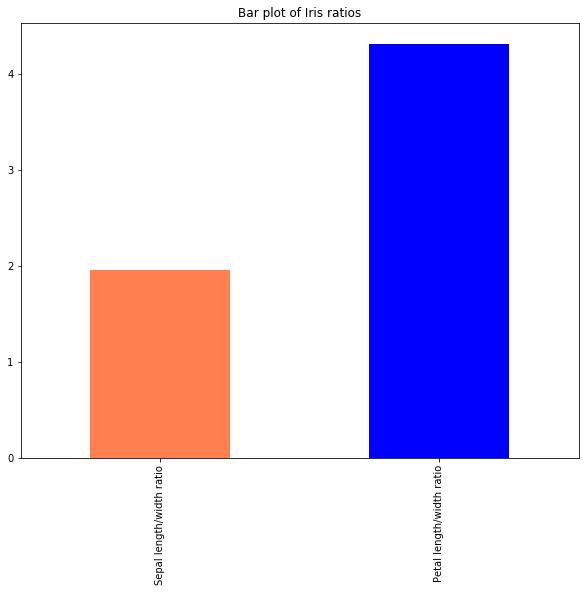

In [16]:
#filter the data to select the data
barSeries = pd.Series({'Sepal Ratio':(df_iris['sepal_length']/df_iris['sepal_width']), 
                         'Petal Ratio':(df_iris['petal_length']/df_iris['petal_width'])})

#apply mean() function the the filtered data
plotData = pd.Series((barSeries['Sepal Ratio'].mean(), barSeries['Petal Ratio'].mean()),
                    ['Sepal length/width ratio', 'Petal length/width ratio'])

#plot it!
barPlot = plotData.plot.bar(figsize=(10,8),
                             title = 'Bar plot of Iris ratios',
                             color = ['coral','blue']
                             )

In this graph, you can see that sepal lengths are approximately double their width on average. Petal lengths are over 4 times their widths on average.

Sometimes it might be easier to read with the bars going horizontally rather than vertically. This can be achieved by using a barh plot instead of the bar plot.

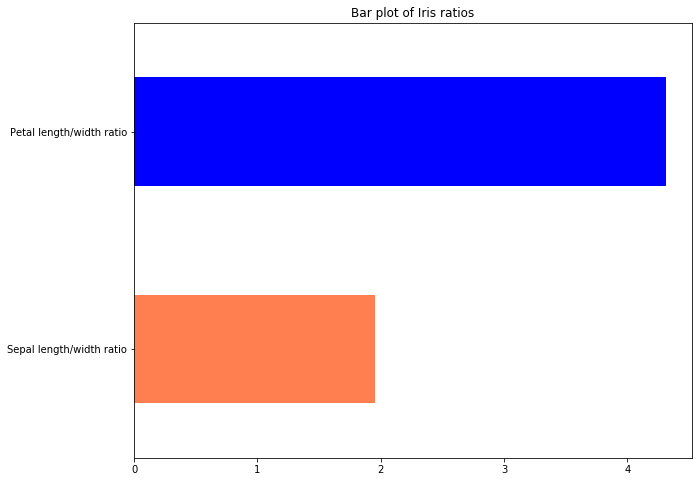

In [17]:
barPlot = plotData.plot.barh(figsize=(10,8),
                             title = 'Bar plot of Iris ratios',
                             color = ['coral','blue']
                             )